# Current in the Phase Diagram

Calculate the current of all the trajectories in the frequency sweep. Use them to draw a colored region in the phase diagram. 

#  Calculate Currents

In [1]:
import sys
import os
sys.path.insert(0, '../magcolloids')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import HTML, clear_output
import jsonpickle
import scipy.optimize as spo
import scipy.spatial as spa 
import magcolloids as mgc
import matplotlib as mpl
import string as st

import support as sp

from tqdm import tqdm_notebook

ureg = mgc.ureg

idx = pd.IndexSlice

%reload_ext autoreload
%autoreload 2

In [2]:
mpl.rc('text', usetex=True)
mpl.rcParams['figure.dpi'] = 150

In [3]:
directory = ["Z:/Dimers/Simulations/FrequencySweep_3.9/",
             "Z:/Dimers/Simulations/FrequencySweep_3.5/"]
index_name = "index.dat"

index = [pd.read_csv(os.path.join(d,index_name),sep=" ",names=["filename","height","tilt"]) for d in directory]

In [4]:
diff_vel_pd = []

for i,d in enumerate(directory):
    diff_vel_pd.append(pd.read_csv(os.path.join(d,"differentiated_velocities.dat"), sep = "\t", index_col = [0,1,2]))

    diff_vel_pd[i].loc[:,"height"] = index[i].height[diff_vel_pd[i].index.get_level_values(0)].values
    diff_vel_pd[i].loc[:,"tilt"] = index[i].tilt[diff_vel_pd[i].index.get_level_values(0)].values
    diff_vel_pd[i].loc[:,"frequency"] = diff_vel_pd[i].index.get_level_values("frequency")
    diff_vel_pd[i].loc[:,"plane"] = diff_vel_pd[i].index.get_level_values("plane")


diff_vel_pd = pd.concat(diff_vel_pd)

In [5]:
diff_vel = diff_vel_pd.set_index(["height","tilt","frequency","plane"])
diff_vel = diff_vel.sort_index()

In [6]:
diff_vel.head()

x         y
height tilt frequency plane                    
3.5    0.0  0.125     down   0.048374  0.140152
                      up    -0.061342 -0.140508
            0.250     down  -0.173336 -0.180430
                      up     0.192590  0.223416
            0.375     down  -0.145923  0.269869

In [7]:
for d in directory:
    diff_vel.to_csv(os.path.join(d,"differentiated_velocities_cleaner.dat"), sep = "\t")

In [8]:
d = 2.8
phi = 0.2625

freq = diff_vel.index.get_level_values("frequency").unique().values[0]
factor = freq*d*np.sqrt(np.pi/np.sqrt(3)/phi)

def calc_current(series):
    freq = series.index.get_level_values("frequency").unique().values[0]
    factor = freq*d*np.sqrt(np.pi/np.sqrt(3)/phi)
    out = series.loc[idx[:,:,:,"up"],:].reset_index(level=3,drop=True) - \
        series.loc[idx[:,:,:,"down"],:].reset_index(level=3,drop=True)
    
    return pd.DataFrame(data = [np.sqrt(out.x.values**2+out.y.values**2)/(factor)], columns = ["I"])
    

In [9]:
current = diff_vel.groupby(["height","tilt","frequency"]).apply(calc_current).reset_index(level=3,drop=True)

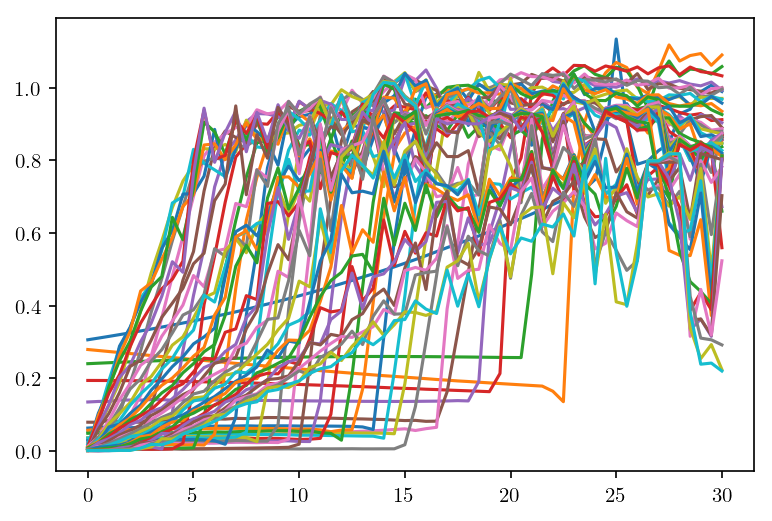

In [10]:
for f,dv in current.loc[idx[3.9,:,:],:].groupby("frequency"):
    plt.plot(dv.index.get_level_values("tilt"),dv.I)

In [11]:
# current.loc[idx[3.9,:,:],:].reset_index(level=0,drop=True).to_csv("current_vs_tilt_vs_freq.dat", sep = "\t")
current.to_csv("current_vs_tilt_vs_freq.dat", sep = "\t")

# Replot phase Diagram

In [12]:
import sys
import os
sys.path.insert(0, '../magcolloids')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import HTML, clear_output
import jsonpickle
import scipy.optimize as spo
import scipy.spatial as spa 
import magcolloids as mgc
import matplotlib as mpl
import string as st

import support as sp

from tqdm import tqdm_notebook

ureg = mgc.ureg

idx = pd.IndexSlice

%reload_ext autoreload
%autoreload 2

In [13]:
mpl.rc('text', usetex=True)
mpl.rcParams['figure.dpi'] = 150

In [14]:
current = pd.read_csv("current_vs_tilt_vs_freq.dat", sep = "\t",index_col=[0,1,2])
current.head()

I
height tilt frequency          
3.5    0.0  0.125      0.327539
            0.250      0.296173
            0.375      0.243804
            0.500      0.202036
            0.625      0.142204

In [15]:
p1 = pd.read_csv("Fanlong_Data/p1.dat",sep="\t",names=["tilt","f"], converters = {"tilt":lambda th: float(th)*180/np.pi})
p2 = pd.read_csv("Fanlong_Data/p2.dat",sep="\t",names=["tilt","f"], converters = {"tilt":lambda th: float(th)*180/np.pi})
p3 = pd.read_csv("Fanlong_Data/p3.dat",sep="\t",names=["tilt","f"], converters = {"tilt":lambda th: float(th)*180/np.pi})

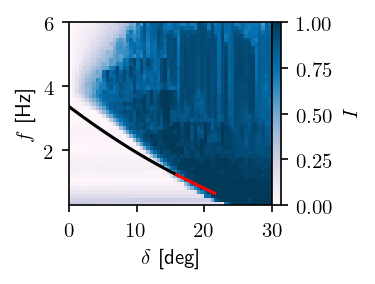

In [16]:
current_mat = current.loc[idx[3.9,:,:],:].reset_index(level=0,drop=True).unstack()
tilt = current_mat.index.get_level_values("tilt")
freq = current_mat.columns.get_level_values("frequency")

fig = plt.figure(figsize=(2.5,2))
cm = plt.pcolormesh(tilt,freq,current_mat.transpose(),cmap="PuBu")
plt.xlabel(r"$\delta$ [deg]")
plt.ylabel("$f$ [Hz]")
plt.ylim(0.25,6)

plt.plot(p1.tilt,p1.f,color="black")
plt.plot(p2.tilt,p2.f,color="red")

plt.clim(0,1)
axcb = fig.colorbar(cm, pad=0)
axcb.set_label(r'$I$')

fig.tight_layout()

fig.savefig('PhaseDiagram_3.9.pdf', pad_inches = 0, bbox_inches = "tight")

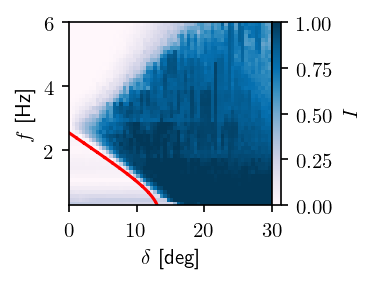

In [17]:
current_mat = current.loc[idx[3.5,:,:],:].reset_index(level=0,drop=True).unstack()
tilt = current_mat.index.get_level_values("tilt")
freq = current_mat.columns.get_level_values("frequency")

fig = plt.figure(figsize=(2.5,2))
cm = plt.pcolormesh(tilt,freq,current_mat.transpose(),cmap="PuBu")
plt.xlabel(r"$\delta$ [deg]")
plt.ylabel("$f$ [Hz]")
plt.ylim(0.25,6)

plt.plot(p3.tilt,p3.f,color="red")

plt.clim(0,1)
axcb = fig.colorbar(cm, pad=0)
axcb.set_label(r'$I$')

fig.tight_layout()

fig.savefig('PhaseDiagram_3.5.pdf', pad_inches = 0, bbox_inches = "tight")

# Combine Plots

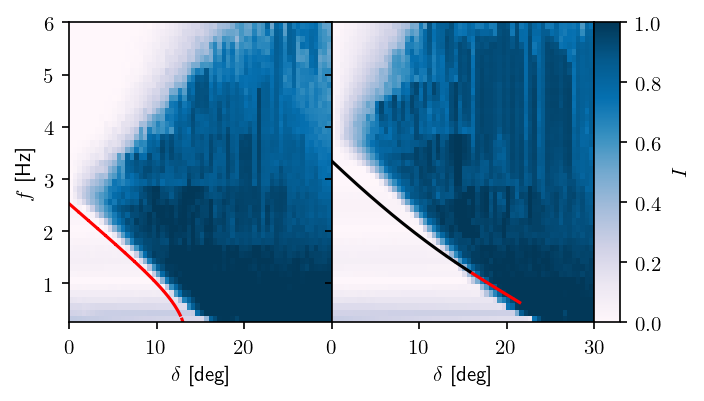

In [18]:
fig = plt.figure(figsize=(3.5,2), frameon = False)

gs1 = mpl.gridspec.GridSpec(1, 2,
                           figure=fig, left = 0, right = 1, top = 1, bottom = 0,
                           hspace=0, wspace=-0)

#gs1 = gs0[0:-1].subgridspec(1, 2)

ax = []
ax.append(fig.add_subplot(gs1[0, 0]))
ax.append(fig.add_subplot(gs1[0, 1],sharey=ax[0]))
#ax.append(fig.add_subplot(gs0[-1]))

current_mat = current.loc[idx[3.5,:,:],:].reset_index(level=0,drop=True).unstack()
tilt = current_mat.index.get_level_values("tilt")
freq = current_mat.columns.get_level_values("frequency")

cm = ax[0].pcolormesh(tilt,freq,current_mat.transpose(),cmap="PuBu")
ax[0].set_xlabel(r"$\delta$ [deg]")
ax[0].set_ylabel("$f$ [Hz]")
ax[0].set_ylim(0.25,6)

ax[0].plot(p3.tilt,p3.f,color="red")

cm.set_clim(0,1)

current_mat = current.loc[idx[3.9,:,:],:].reset_index(level=0,drop=True).unstack()
tilt = current_mat.index.get_level_values("tilt")
freq = current_mat.columns.get_level_values("frequency")

cm = ax[1].pcolormesh(tilt,freq,current_mat.transpose(),cmap="PuBu")
ax[1].set_xlabel(r"$\delta$ [deg]")
ax[1].set_ylim(0.25,6)

ax[1].plot(p2.tilt,p2.f,color="red")
ax[1].plot(p1.tilt,p1.f,color="black")
cm.set_clim(0,1)

plt.setp(ax[1].get_yticklabels(), visible=False);

cbar_ax = fig.add_axes([1, 0, 0.05,1])
ax[0].xaxis.get_major_ticks()[-1].set_visible(False)

axcb = fig.colorbar(cm, cax=cbar_ax)
axcb.set_label(r'$I$')

fig.savefig('PhaseDiagram.png', pad_inches = 0, bbox_inches = "tight")